In [ ]:
#Importing all the required libraries

In [98]:
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from random import randrange, uniform
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score
from scipy import stats
import os
from collections import Counter
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor as vf             
from statsmodels.tools.tools import add_constant

In [99]:
#Set working directory
os.chdir("F:\Edwisor\Car_Fare_Prediction_Project")

In [100]:
print(os.getcwd())

F:\Edwisor\Car_Fare_Prediction_Project


In [101]:
#Load data
df_cab_train = pd.read_csv("train_cab.csv")

In [103]:
#Load data
df_cab_test = pd.read_csv("test.csv")
df_cab_test.dtypes
df_cab_test.shape
df_cab_test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [104]:
#getting structure of the data
type(df_cab_train)

pandas.core.frame.DataFrame

In [105]:
#getting columns data
df_cab_train.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

# Exploratory Data Analysis

In [106]:
#to see the test data rows to segregate categorical and continuous variables
df_cab_train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [107]:
#To know the data types of all the variables
df_cab_train.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [108]:
df_cab_train.shape

(16067, 7)

In [109]:
#getting no. of unique values present in each of the variable/column
df_cab_train.nunique()

fare_amount            468
pickup_datetime      16021
pickup_longitude     13789
pickup_latitude      14241
dropoff_longitude    13887
dropoff_latitude     14263
passenger_count         27
dtype: int64

In [110]:
#Check missing values
#Create dataframe with missing percentage
missing_val = pd.DataFrame(df_cab_train.isnull().sum())

#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(df_cab_train))*100

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

#save output results 
missing_val.to_csv("PercentageMissing.csv", index = False)

missing_cols= missing_val.columns


In [111]:
df_cab_train.isnull().sum().sort_values(ascending=False)

passenger_count      55
fare_amount          24
dropoff_latitude      0
dropoff_longitude     0
pickup_latitude       0
pickup_longitude      0
pickup_datetime       0
dtype: int64

In [39]:
# # Impute with mean
#df_cab_train['passenger_count'] = df_cab_train['passenger_count'].fillna(df_cab_train['passenger_count'].mean())
#df_cab_train.isnull().sum().sort_values(ascending=False)

fare_amount          24
passenger_count       0
dropoff_latitude      0
dropoff_longitude     0
pickup_latitude       0
pickup_longitude      0
pickup_datetime       0
dtype: int64

In [15]:
# # Impute with median
#df_cab_train['passenger_count'] = df_cab_train['passenger_count'].fillna(df_cab_train['passenger_count'].median())
#df_cab_train.isnull().sum().sort_values(ascending=False)

fare_amount          24
passenger_count       0
dropoff_latitude      0
dropoff_longitude     0
pickup_latitude       0
pickup_longitude      0
pickup_datetime       0
dtype: int64

In [ ]:
#Imputing with missing values using KNN
#df_cab_train = pd.DataFrame(KNN(k = 3).fit_transform(df_cab_train), columns = df_cab_train.columns, index=df_cab_train.index)

In [169]:
#passenger_count	0.342316549
#fare_amount	0.149374494
#df_cab_train.shape
#Since the missing value is very less, hence dropping these values

df_cab_train = df_cab_train.drop(df_cab_train[df_cab_train.isnull().any(1)].index, axis = 0)

In [113]:
df_cab_train.shape

(15988, 7)

In [114]:
#Basic business assumptions:
#Fare amount should be a positive value
#pickup_datetime should be datetime type
df_cab_train.dtypes
df_cab_train['pickup_datetime'].describe()

count                       15988
unique                      15943
top       2013-06-28 00:08:00 UTC
freq                            2
Name: pickup_datetime, dtype: object

In [115]:
#df_cab_train['pickup_datetime']  = pd.to_datetime(df_cab_train['pickup_datetime'],format='%Y-%m-%d %H:%M:%S %Z', errors='coerc
df_cab_train['pickup_datetime']  = df_cab_train.pickup_datetime.str[:20]
df_cab_train['pickup_datetime']  = pd.to_datetime(df_cab_train['pickup_datetime'], format = '%Y/%m/%d %H:%M:%S',errors='coerce')


In [116]:
df_cab_train = df_cab_train.drop(df_cab_train[df_cab_train.isnull().any(1)].index, axis = 0)

In [117]:
df_cab_train.dtypes

fare_amount                  object
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
dtype: object

In [118]:
df_cab_train['Year'] = df_cab_train['pickup_datetime'].dt.year
df_cab_train['Month'] = df_cab_train['pickup_datetime'].dt.month
df_cab_train['Date'] = df_cab_train['pickup_datetime'].dt.day
df_cab_train['Day of Week'] = df_cab_train['pickup_datetime'].dt.dayofweek
df_cab_train['Hour'] = df_cab_train['pickup_datetime'].dt.hour
df_cab_train['Minute'] = df_cab_train['pickup_datetime'].dt.minute

In [119]:
col_list=list(df_cab_train.columns.values)
col_list=col_list[6:13]
print(col_list)

['passenger_count', 'Year', 'Month', 'Date', 'Day of Week', 'Hour', 'Minute']


In [120]:
for i in col_list:
    df_cab_train[i] = df_cab_train[i].astype('int64')

In [121]:
df_cab_train.dtypes

fare_amount                  object
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
Year                          int64
Month                         int64
Date                          int64
Day of Week                   int64
Hour                          int64
Minute                        int64
dtype: object

In [122]:
df_cab_train['fare_amount']=pd.to_numeric(df_cab_train['fare_amount'], errors='coerce')

In [123]:
df_cab_train.isnull().sum().sort_values(ascending=False)

fare_amount          1
Minute               0
Hour                 0
Day of Week          0
Date                 0
Month                0
Year                 0
passenger_count      0
dropoff_latitude     0
dropoff_longitude    0
pickup_latitude      0
pickup_longitude     0
pickup_datetime      0
dtype: int64

In [53]:
#Now, we are free from any missing value as given above

In [ ]:
#CONVERSION FOR TEST DATA

In [124]:
df_cab_test.isnull().sum().sort_values(ascending=False)

passenger_count      0
dropoff_latitude     0
dropoff_longitude    0
pickup_latitude      0
pickup_longitude     0
pickup_datetime      0
dtype: int64

In [125]:
#Checking and Refining test data
#Basic business assumptions:
#Fare amount should be a positive value
#pickup_datetime should be datetime type
df_cab_test.dtypes
df_cab_test['pickup_datetime'].describe()

count                        9914
unique                       1753
top       2011-12-13 22:00:00 UTC
freq                          270
Name: pickup_datetime, dtype: object

In [126]:
df_cab_test['pickup_datetime']  = df_cab_test.pickup_datetime.str[:20]
df_cab_test['pickup_datetime']  = pd.to_datetime(df_cab_test['pickup_datetime'], format = '%Y/%m/%d %H:%M:%S',errors='coerce')
df_cab_test = df_cab_test.drop(df_cab_test[df_cab_test.isnull().any(1)].index, axis = 0)
df_cab_test.isnull().sum().sort_values(ascending=False)

passenger_count      0
dropoff_latitude     0
dropoff_longitude    0
pickup_latitude      0
pickup_longitude     0
pickup_datetime      0
dtype: int64

In [127]:
df_cab_test['Year'] = df_cab_test['pickup_datetime'].dt.year
df_cab_test['Month'] = df_cab_test['pickup_datetime'].dt.month
df_cab_test['Date'] = df_cab_test['pickup_datetime'].dt.day
df_cab_test['Day of Week'] = df_cab_test['pickup_datetime'].dt.dayofweek
df_cab_test['Hour'] = df_cab_test['pickup_datetime'].dt.hour
df_cab_test['Minute'] = df_cab_test['pickup_datetime'].dt.minute

In [128]:
col_list_test=list(df_cab_test.columns.values)
col_list_test=col_list_test[5:]
print(col_list_test)

['passenger_count', 'Year', 'Month', 'Date', 'Day of Week', 'Hour', 'Minute']


In [129]:
for i in col_list_test:
    df_cab_test[i] = df_cab_test[i].astype('int64')

In [130]:
df_cab_test.dtypes

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
Year                          int64
Month                         int64
Date                          int64
Day of Week                   int64
Hour                          int64
Minute                        int64
dtype: object

In [131]:
Counter(df_cab_train['fare_amount']<0)

Counter({False: 15984, True: 3})

In [132]:
df_cab_train['fare_amount'].describe()

count    15986.000000
mean        15.030453
std        431.213944
min         -3.000000
25%          6.000000
50%          8.500000
75%         12.500000
max      54343.000000
Name: fare_amount, dtype: float64

In [133]:
#Removing the cases of negative fare
df_cab_train = df_cab_train.drop(df_cab_train[df_cab_train['fare_amount']<0].index, axis=0)
df_cab_train.shape

(15984, 13)

In [134]:
#Working upon the latitude and longitudes
#As per wikipedia to try to get the domain knowledge, range of coordinates in real life situation are :
#Latitudes range from -90 to 90.
#Longitudes range from -180 to 180.
#Hence filtering the un realistic values

df_cab_train[df_cab_train['pickup_latitude']<-90]
df_cab_train[df_cab_train['pickup_latitude']>90]

#After refining the data set given we can see that there are still some records for which fare amount and num of passengers is 0
#Hence considering a business scenario that these scenes are not possible, dropping these values
df_cab_train = df_cab_train.drop(df_cab_train[df_cab_train['passenger_count']==0].index, axis=0)
df_cab_train = df_cab_train.drop(df_cab_train[df_cab_train['fare_amount']==0.0].index, axis=0)

In [135]:
#Hence dropping one value of >90
df_cab_train = df_cab_train.drop((df_cab_train[df_cab_train['pickup_latitude']<-90]).index, axis=0)
df_cab_train = df_cab_train.drop((df_cab_train[df_cab_train['pickup_latitude']>90]).index, axis=0)

In [136]:
df_cab_train[df_cab_train['pickup_longitude']<-180]
df_cab_train[df_cab_train['pickup_longitude']>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day of Week,Hour,Minute


In [137]:
df_cab_train[df_cab_train['dropoff_latitude']<-90]
df_cab_train[df_cab_train['dropoff_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day of Week,Hour,Minute


In [138]:
df_cab_train[df_cab_train['dropoff_longitude']<-180]
df_cab_train[df_cab_train['dropoff_longitude']>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day of Week,Hour,Minute


In [ ]:
#https://community.esri.com/groups/coordinate-reference-systems/blog/2017/10/05/haversine-formula
#Calculating distance based on the coordinates given
#taken help of above website for implementing Haversine formula

In [139]:
def haversine_distance(lat1, long1, lat2, long2):
    data = [df_cab_train,df_cab_test]
    for i in data:
        R = 6371  #radius of earth in kilometers
        
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        i['Distance_Travelled'] = d
    return d

In [140]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0        2.323259
1        2.425353
2        0.618628
3        1.961033
4        5.387301
5        3.222549
6        0.929601
7       21.540102
8        3.873962
9        1.099794
10       2.317685
11       4.819179
12       0.722670
13       1.675503
14       2.504032
15       5.115375
16       0.298838
17       2.531147
18       0.780444
19       0.427282
20       1.651946
21       1.969211
22       1.305441
23       1.901295
24       5.779720
25       1.121687
26      14.306540
27       9.427870
28       1.144529
29       4.696371
          ...    
9884    15.119293
9885     5.006239
9886     7.376754
9887     1.680721
9888     0.000000
9889     2.377723
9890     2.944581
9891     5.952839
9892     2.950361
9893     4.735375
9894     3.101361
9895     9.000325
9896     2.398161
9897     5.081664
9898     0.555287
9899     5.610505
9900     1.890608
9901     1.530118
9902     3.891526
9903     2.299316
9904    15.091262
9905     9.613798
9906     0.369506
9907     9.923998
9908     1

C:\Users\hp word\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Users\hp word\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
C:\Users\hp word\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
C:\Users\hp word\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
C:\Users\hp word\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1262: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


Text(0.5, 0, 'Fare')

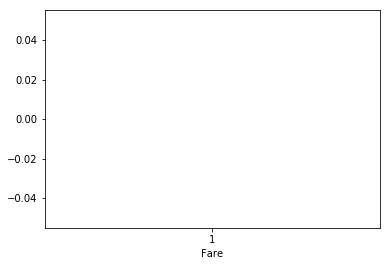

In [141]:
#Outlier Analysis
#Plot boxplot to visualize Outliers
# %matplotlib inline  
plt.boxplot(df_cab_train['fare_amount'])
plt.xlabel('Fare')

In [142]:
df_cab_train['passenger_count'].describe()

count    15924.000000
mean         2.633007
std         61.010255
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

In [143]:
Counter(df_cab_train['passenger_count']==0)

Counter({False: 15924})

In [144]:
df_cab_train = df_cab_train.drop(df_cab_train[df_cab_train['passenger_count']==0].index, axis=0)

Text(0.5, 0, 'pickup_latitude')

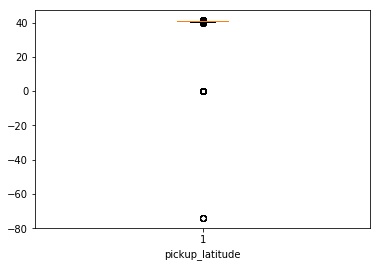

In [145]:
plt.boxplot(df_cab_train['pickup_latitude'])
plt.xlabel('pickup_latitude')

Text(0.5, 0, 'pickup_longitude')

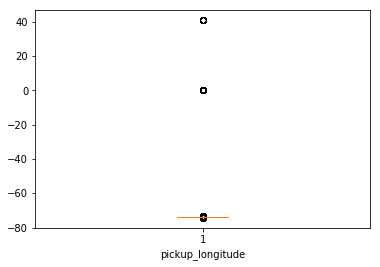

In [146]:
plt.boxplot(df_cab_train['pickup_longitude'])
plt.xlabel('pickup_longitude')

Text(0.5, 0, 'dropoff_longitude')

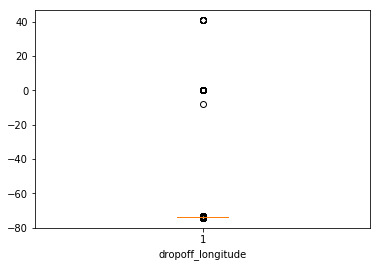

In [147]:
plt.boxplot(df_cab_train['dropoff_longitude'])
plt.xlabel('dropoff_longitude')

Text(0.5, 0, 'Distance_Travelled')

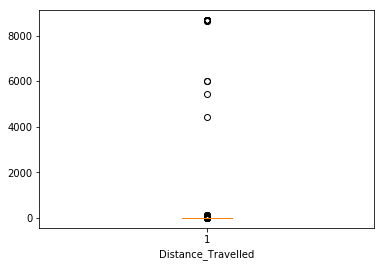

In [148]:
plt.boxplot(df_cab_train['Distance_Travelled'])
plt.xlabel('Distance_Travelled')

In [ ]:
# list of variables have outlier
cont_var = ['Distance_Travelled']

# Looping over all continuou variables to detect and remove Outliers
for i in cont_var:
    # Avoiding the variables which doesn't have outlier
    # Getting 75 and 25 percentile of variable "i"
    q75, q25 = np.percentile(df_cab_train[i], [75,25])
    # Calculating Interquartile range
    iqr = q75 - q25
    
    # Calculating upper extreme and lower extreme
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    
    # Replacing all the outliers value to NA
    df_cab_train.loc[df_cab_train[i]< minimum,i] = np.nan
    df_cab_train.loc[df_cab_train[i]> maximum,i] = np.nan

In [149]:
df_cab_train.sort_values('Distance_Travelled', ascending=False)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day of Week,Hour,Minute,Distance_Travelled
9147,8.50,2014-07-14 21:37:29,0.000000,0.000000,-74.002037,40.752035,1,2014,7,14,0,21,37,8667.542104
8647,21.50,2014-03-27 18:01:00,-74.001808,40.750782,0.000000,0.000000,1,2014,3,27,3,18,1,8667.497512
2397,45.00,2012-06-24 17:11:10,0.000000,0.000000,-74.010230,40.714553,2,2012,6,24,6,17,11,8667.454421
472,2.50,2009-02-22 22:48:00,0.000000,0.000000,-74.005433,40.726685,2,2009,2,22,6,22,48,8667.304968
11653,16.00,2015-03-04 16:06:28,0.000000,0.000000,-73.985329,40.778534,1,2015,3,4,2,16,6,8666.701504
13340,18.50,2014-03-31 12:34:47,0.000000,0.000000,-73.997643,40.724432,1,2014,3,31,0,12,34,8666.613646
10215,13.30,2011-03-18 09:33:41,0.000000,0.000000,-73.990138,40.753392,1,2011,3,18,4,9,33,8666.584706
4597,6.90,2010-03-30 07:12:00,0.000000,0.000000,-73.989693,40.754280,1,2010,3,30,1,7,12,8666.566030
10458,2.50,2013-02-23 20:58:00,-73.979678,40.765962,0.000000,0.000000,1,2013,2,23,5,20,58,8665.976222
10672,18.00,2015-04-30 15:34:46,-73.979355,40.753902,0.000000,0.000000,1,2015,4,30,3,15,34,8665.702390


In [150]:
#after refining the data set given we can see that there are still some records for which fare amount and num of passengers is 0
#Hence considering a business scenario that these scenes are not possible, dropping these values

df_cab_train = df_cab_train.drop(df_cab_train[df_cab_train['passenger_count']==0].index, axis=0)
df_cab_train = df_cab_train.drop(df_cab_train[df_cab_train['fare_amount']==0.0].index, axis=0)

Text(0, 0.5, 'Frequency')

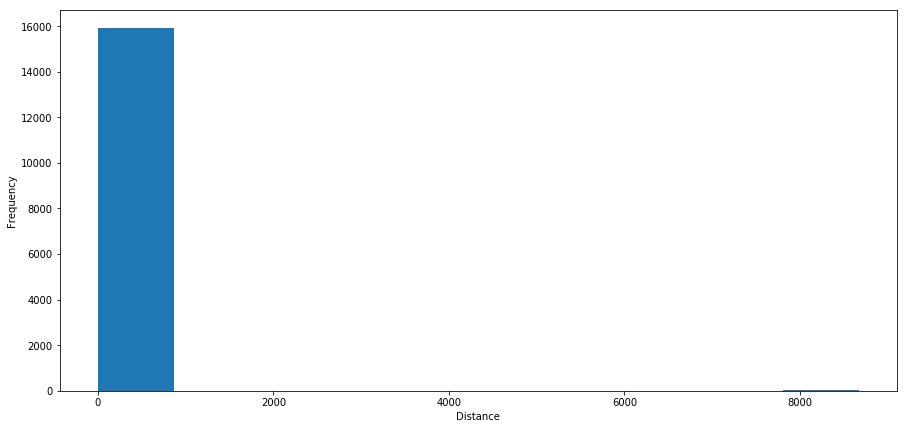

In [151]:
plt.figure(figsize=(15,7))
plt.hist(df_cab_train['Distance_Travelled'], bins=10)
plt.xlabel('Distance')
plt.ylabel('Frequency')

In [152]:

def scatterplot(x_data, y_data, x_label="", y_label="", title="", color = "r", yscale_log=False):

    # Create the plot object
    _, ax = plt.subplots()

    # Plot the data, set the size (s), color and transparency (alpha)
    # of the points
    ax.scatter(x_data, y_data, s = 30, color = color, alpha = 0.75)

    if yscale_log == True:
        ax.set_yscale('log')

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

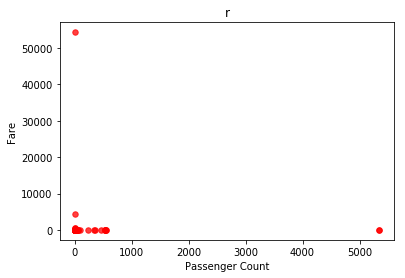

In [153]:
#we observe that single passengers are most frequent travellers and also have paid the highest fare
scatterplot(df_cab_train['passenger_count'],df_cab_train['fare_amount'],"Passenger Count","Fare","r")

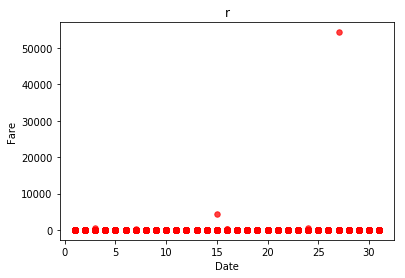

In [154]:
scatterplot(df_cab_train['Date'],df_cab_train['fare_amount'],"Date","Fare","r")

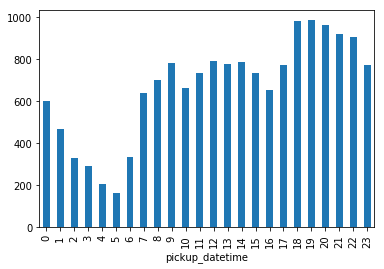

In [156]:
#Lowest cabs at 5 AM and highest at and around 7 PM i.e the office rush hours
df_cab_train.groupby([ df_cab_train["pickup_datetime"].dt.hour])['pickup_datetime'].count().plot(kind="bar")

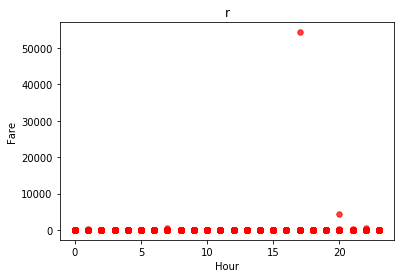

In [157]:
#We can observe that the cabs taken at 7 am and 23 Pm are the costliest. 
#Hence we can assume that cabs taken early in morning and late at night are costliest
scatterplot(df_cab_train['Hour'],df_cab_train['fare_amount'],"Hour","Fare","r")

Text(0, 0.5, 'Frequency')

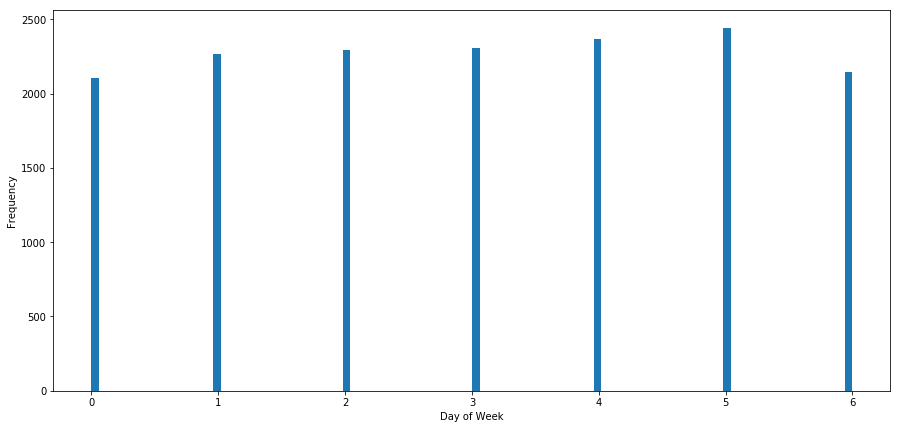

In [158]:
#Effect of day of week
#Not much difference is made becuase of day of week
plt.figure(figsize=(15,7))
plt.hist(df_cab_train['Day of Week'], bins=100)
plt.xlabel('Day of Week')
plt.ylabel('Frequency')

In [159]:
#making some analysis over distance and fare
#We have arrived at 2 cases for distance travelled as 0
#Case1 - Pickup and drop locations are same- May be the cab was cancelled after arrival. Hence the situatio
#Case2- The pickup and drop locations are (0.00,0.00) coordinates which upon googling came out to be location present in middle of ocean
df_cab_train[df_cab_train['Distance_Travelled']==0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day of Week,Hour,Minute,Distance_Travelled
11,5.50,2012-12-24 11:24:00,0.000000,0.000000,0.000000,0.000000,3,2012,12,24,0,11,24,0.0
15,5.00,2013-11-23 12:57:00,0.000000,0.000000,0.000000,0.000000,1,2013,11,23,5,12,57,0.0
105,52.00,2009-03-25 00:08:52,-74.035839,40.747320,-74.035839,40.747320,1,2009,3,25,2,0,8,0.0
124,8.00,2013-01-17 17:22:00,0.000000,0.000000,0.000000,0.000000,2,2013,1,17,3,17,22,0.0
191,6.50,2014-01-08 21:55:58,-73.998488,40.726303,-73.998488,40.726303,1,2014,1,8,2,21,55,0.0
192,3.70,2010-09-05 17:08:00,0.000000,0.000000,0.000000,0.000000,5,2010,9,5,6,17,8,0.0
233,8.50,2011-07-24 01:14:35,0.000000,0.000000,0.000000,0.000000,236,2011,7,24,6,1,14,0.0
270,7.50,2012-08-25 01:53:42,-73.995892,40.746454,-73.995892,40.746454,1,2012,8,25,5,1,53,0.0
273,8.10,2009-10-30 18:13:00,0.000000,0.000000,0.000000,0.000000,4,2009,10,30,4,18,13,0.0
290,6.90,2009-12-14 12:33:00,-73.982432,40.745747,-73.982432,40.745747,1,2009,12,14,0,12,33,0.0


In [160]:
df_cab_train.shape

(15924, 14)

In [161]:
#removing values where Location as 0,0 latitude longitude
df_cab_train = df_cab_train.drop(df_cab_train[(df_cab_train['pickup_longitude']==0.000000) | (df_cab_train['pickup_longitude']==0.000000)].index, axis=0)    
#removing values where Location as 0,0 latitude longitude
df_cab_train = df_cab_train.drop(df_cab_train[(df_cab_train['dropoff_longitude']==0.000000) | (df_cab_train['dropoff_longitude']==0.000000)].index, axis=0)    


In [162]:
#Considering a base cancellation fee of amount 20, modifying the fare_amount for the cases of same pickup and drop points
df_cab_train.loc[df_cab_train['Distance_Travelled'] == 0, 'fare_amount'] = 20

In [163]:
#dropping the outliers of distance travelled mentioned along with the boxplot- 5420.988959, 4447.086698
df_cab_train.sort_values('Distance_Travelled', ascending=False)

df_cab_train = df_cab_train.drop(df_cab_train[df_cab_train['Distance_Travelled']> 50].index, axis=0)  


In [164]:
col_list=list(df_cab_train.columns.values)
print(col_list)

['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'Year', 'Month', 'Date', 'Day of Week', 'Hour', 'Minute', 'Distance_Travelled']


In [165]:
#Feature Selection
df_corr = df_cab_train.loc[:,col_list]

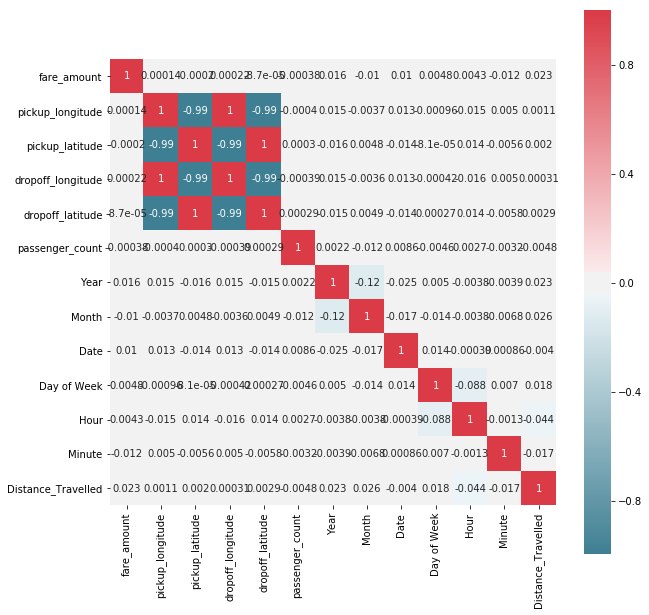

In [166]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(10, 10))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)

In [ ]:
#Chi Square Test of Independence

In [167]:
for i in df_cab_train:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(df_cab_train['fare_amount'], df_cab_train[i]))
    print(dof)

fare_amount
203401
pickup_datetime
7009893
pickup_longitude
6166072
pickup_latitude
6362257
dropoff_longitude
6203956
dropoff_latitude
6374434
passenger_count
9471
Year
2706
Month
4961
Date
13530
Day of Week
2706
Hour
10373
Minute
26609
Distance_Travelled
6960283


In [170]:
# Making a list of missing value types 
missing_values = ["NaN","nan"," "]
#df1 = pd.read_excel("train.xls", na_values = missing_values)
median = df_cab_train.median()
df_cab_train.fillna(median, inplace=True)

In [171]:
#checking vif of numerical column withhout dropping multicollinear column
continuous_df = add_constant(df_cab_train[['fare_amount', 'pickup_latitude', 'pickup_longitude', 'pickup_latitude', 'passenger_count' ]])
vif = pd.Series([vf(continuous_df.values, i) for i in range(continuous_df.shape[1])], 
                 index = continuous_df.columns)
vif.round(1)

C:\Users\hp word\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


const               14939.9
fare_amount             1.0
pickup_latitude         inf
pickup_longitude       97.5
pickup_latitude         inf
passenger_count         1.0
dtype: float64

In [172]:
#Normalisation
for i in col_list:
   if i !='pickup_datetime':
       df_cab_train[i] = (df_cab_train[i] - df_cab_train[i].min())/(df_cab_train[i].max() - df_cab_train[i].min())

In [73]:
df_cab_train

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day of Week,Hour,Minute,Distance_Travelled
0,0.000083,2009-06-15 17:26:21,0.005155,0.994411,0.005100,0.994333,0.000000,0.000000,0.454545,0.466667,0.000000,0.739130,0.440678,0.023615
1,0.000311,2010-01-05 16:52:16,0.003665,0.994324,0.003906,0.994937,0.000000,0.166667,0.000000,0.133333,0.166667,0.695652,0.881356,0.193594
2,0.000105,2011-08-18 00:35:00,0.003954,0.994757,0.003802,0.994664,0.000187,0.333333,0.636364,0.566667,0.500000,0.000000,0.593220,0.031834
3,0.000142,2012-04-21 04:30:42,0.003916,0.994513,0.003799,0.994730,0.000000,0.500000,0.272727,0.666667,0.833333,0.173913,0.508475,0.064132
4,0.000097,2010-03-09 07:51:00,0.004081,0.994816,0.004102,0.994952,0.000000,0.166667,0.181818,0.266667,0.166667,0.304348,0.864407,0.045801
5,0.000222,2011-01-06 09:50:45,0.003796,0.994500,0.003961,0.994731,0.000000,0.333333,0.000000,0.166667,0.500000,0.391304,0.847458,0.086766
6,0.000138,2012-11-20 20:35:00,0.003978,0.994674,0.003953,0.994788,0.000000,0.500000,0.909091,0.633333,0.166667,0.869565,0.593220,0.035644
7,0.000303,2012-01-04 17:22:00,0.004227,0.994869,0.003812,0.994669,0.000000,0.500000,0.000000,0.100000,0.333333,0.739130,0.372881,0.095202
9,0.000164,2009-09-02 01:11:00,0.003972,0.994520,0.003799,0.994730,0.000187,0.000000,0.727273,0.033333,0.333333,0.043478,0.186441,0.065285
10,0.000097,2012-04-08 07:30:50,0.003836,0.994548,0.003893,0.994517,0.000000,0.500000,0.272727,0.233333,1.000000,0.304348,0.508475,0.031492


In [173]:
# Making a list of missing value types 
missing_values = ["NaN","nan"," "]
#df1 = pd.read_excel("train.xls", na_values = missing_values)
median = df_cab_train.median()
df_cab_train.fillna(median, inplace=True)

In [174]:
#Applying Machine Learning
df_cab_test['Predicted_fare'] = 0

In [175]:
df_cab_test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day of Week,Hour,Minute,Distance_Travelled,Predicted_fare
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,2.323259,0
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,2.425353,0
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.618628,0
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.961033,0
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,5.387301,0


In [176]:
#dropping pickup datetime as we have already extracted the relative fields from it
df_train = df_cab_train.drop(['pickup_datetime'], axis = 1)
df_test=df_cab_test.drop(['pickup_datetime'], axis=1)

In [177]:
#Divide data into train and test
train, test = train_test_split(df_train, test_size=0.2)

In [178]:
#Apply linear Regression Model
# Importing libraries for Linear Regression
from sklearn.linear_model import LinearRegression

#Building Random forest model
Model_LR = LinearRegression().fit(train.iloc[:,1:], train.iloc[:,0])

#Apply model on test data
predictions_LR = Model_LR.predict(test.iloc[:,1:])

In [179]:
# Calculating RMSE for test data to check accuracy for LT
rmse_for_test =np.sqrt(mean_squared_error(test.iloc[:,0],predictions_LR))
rsquare_for_test=r2_score(test.iloc[:,0],predictions_LR)
print("RMSE for LR " + str(rmse_for_test))
print("R-Square for LR "+str(rsquare_for_test))

RMSE for LR 0.0014614573625839115
R-Square for LR -0.023691955860369873


In [180]:
#Applying Decision Tree
#Building DT model
Model_DT = DecisionTreeRegressor(max_depth=2).fit(train.iloc[:,1:], train.iloc[:,0])

#Apply model on test data obtained from train data
predictions_DT = Model_DT.predict(test.iloc[:,1:])

In [181]:
# Calculating RMSE and Rsquare for test data to check accuracy for DT
rmse_for_test =np.sqrt(mean_squared_error(test.iloc[:,0],predictions_DT))
rsquare_for_test=r2_score(test.iloc[:,0],predictions_DT)
print("RMSE for DT " + str(rmse_for_test))
print("R-Square for DT "+str(rsquare_for_test))

RMSE for DT 0.0019053718215268686
R-Square for DT -0.7400289257205572


In [182]:
df_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day of Week,Hour,Minute,Distance_Travelled,Predicted_fare
0,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,2.323259,0
1,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,2.425353,0
2,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.618628,0
3,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.961033,0
4,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,5.387301,0


In [183]:
#Applying Random Forest
# Importing libraries for Random Forest
from sklearn.ensemble import RandomForestRegressor

#Building Random forest model
Model_RF = RandomForestRegressor(n_estimators = 20).fit(train.iloc[:,1:], train.iloc[:,0])

#Apply model on test data
predictions_RF = Model_RF.predict(test.iloc[:,1:])

In [184]:
# Calculating RMSE for test data to check accuracy for RF
rmse_for_test =np.sqrt(mean_squared_error(test.iloc[:,0],predictions_RF))
rsquare_for_test=r2_score(test.iloc[:,0],predictions_RF)
print("RMSE for RF " + str(rmse_for_test))
print("R-Square for RF "+str(rsquare_for_test))

RMSE for RF 0.0044384383804509115
R-Square for RF -8.441856189928615


In [185]:
df_test.isnull().sum().sort_values(ascending=False)

Predicted_fare        0
Distance_Travelled    0
Minute                0
Hour                  0
Day of Week           0
Date                  0
Month                 0
Year                  0
passenger_count       0
dropoff_latitude      0
dropoff_longitude     0
pickup_latitude       0
pickup_longitude      0
dtype: int64

In [186]:
df_test.iloc[:,11]

0        2.323259
1        2.425353
2        0.618628
3        1.961033
4        5.387301
5        3.222549
6        0.929601
7       21.540102
8        3.873962
9        1.099794
10       2.317685
11       4.819179
12       0.722670
13       1.675503
14       2.504032
15       5.115375
16       0.298838
17       2.531147
18       0.780444
19       0.427282
20       1.651946
21       1.969211
22       1.305441
23       1.901295
24       5.779720
25       1.121687
26      14.306540
27       9.427870
28       1.144529
29       4.696371
          ...    
9884    15.119293
9885     5.006239
9886     7.376754
9887     1.680721
9888     0.000000
9889     2.377723
9890     2.944581
9891     5.952839
9892     2.950361
9893     4.735375
9894     3.101361
9895     9.000325
9896     2.398161
9897     5.081664
9898     0.555287
9899     5.610505
9900     1.890608
9901     1.530118
9902     3.891526
9903     2.299316
9904    15.091262
9905     9.613798
9906     0.369506
9907     9.923998
9908     1

In [187]:
#Applying model to our test data by using Linear Regression Model

#Building Random forest model
#Model_LR = LinearRegression().fit(train.iloc[:,1:], train.iloc[:,0])

#Apply model on test data
df_test['Predicted_fare'] = Model_LR.predict(df_test.iloc[:,0:12])


In [188]:
df_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day of Week,Hour,Minute,Distance_Travelled,Predicted_fare
0,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,2.323259,1.004371
1,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,2.425353,1.015327
2,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.618628,0.977280
3,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.961033,0.991233
4,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,5.387301,0.987651


In [189]:
#Hypermeter Tunning
rf = RandomForestRegressor(random_state = 42)
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [190]:
from sklearn.model_selection import GridSearchCV    
## Grid Search CV for random Forest model
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(df_train,df_train)
view_best_params_GRF = gridcv_rf.best_params_

#Apply model on test data
predictions_GRF = gridcv_rf.predict(df_test)

#R^2
GRF_r2 = r2_score(df_test, predictions_GRF)
#Calculating RMSE
GRF_rmse = np.sqrt(mean_squared_error(df_test,predictions_GRF))

print('Grid Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_GRF)
print('R-squared = {:0.2}.'.format(GRF_r2))
print('RMSE = ',(GRF_rmse))

Grid Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'max_depth': 13, 'n_estimators': 19}
R-squared = -8.2e+05.
RMSE =  559.0912693810299
